In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# from tqdm import

In [2]:
connectivity_min, connectivity_max = 0.1,65

total_time = 1000
neuron_model = 'Rotational'
model_folder_name = neuron_model+'_ensembles'

# Capture related ensembles

In [3]:
def list_folders_in_path(path):
    return [ name for name in os.listdir( path ) if os.path.isdir( os.path.join(path, name) ) ]

In [4]:
num_neurons = 10000
target_networks_name = 'N{}_T{}'.format(num_neurons,total_time)
target_path = os.path.join(model_folder_name,target_networks_name)
all_g_folders = list_folders_in_path(target_path)
desired_g_folders = all_g_folders

In [5]:
sigma_glossary_dict = {}
amin_saman_param_glossary_dict = {}
mean_periods_arr_dict = {}

In [6]:
for g_folder in desired_g_folders:
    g = float( g_folder.split('_')[1] ) #folder names are g_#
    
    sigma_glossary_dict[g] = []
    mean_periods_arr_dict[g] = []
    amin_saman_param_glossary_dict[g] = []
    
    g_path = os.path.join(target_path, g_folder)
    g_ensembles_list = list_folders_in_path(g_path)
    
    for ensemble_num in g_ensembles_list:
        ensemble_path = os.path.join(g_path, ensemble_num)
        with open( os.path.join(ensemble_path,'sigma.txt') ) as file:
            sigma = float( file.readline() )
            sigma_glossary_dict[g].append( sigma )
        
        if neuron_model == 'Rotational': #if not does not exist
            with open( os.path.join(ensemble_path,'amin_saman_param.txt') ) as file:
                amin_saman_param = float( file.readline() )        
                amin_saman_param_glossary_dict[g].append( amin_saman_param )        
        
        mean_periods_arr_dict[g].append( np.loadtxt(os.path.join(ensemble_path,'mean_spiking_periods.txt')) )
        


## Standard deviation of the current

In [7]:
g_list = [float(name.split('_')[1]) for name in desired_g_folders ]
g_list.sort()
sigma_mean = [ np.mean(sigma_glossary_dict[g]) for g in g_list ]
sigma_err = [ np.var(sigma_glossary_dict[g])**(0.5) for g in g_list ]

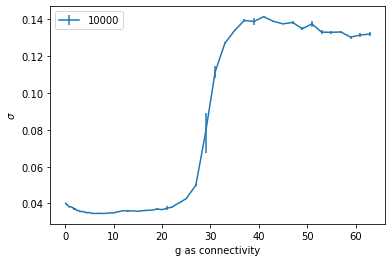

In [8]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = g_list, y = sigma_mean, yerr = sigma_err, label = str(num_neurons))

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$\sigma$')
fig.savefig(os.path.join(target_path,'sigma_g_{}_{}.png'.format(connectivity_min, connectivity_max)) )

## Amin Saman parameter

In [9]:
amin_saman_param_mean = [ np.mean(amin_saman_param_glossary_dict[g]) for g in g_list ]
amin_saman_param_err = [ np.var(amin_saman_param_glossary_dict[g])**(0.5) for g in g_list ]

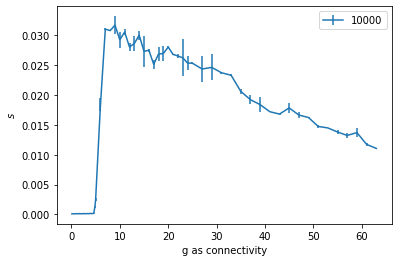

In [10]:
fig = plt.figure()
ax = fig.subplots()
ax.errorbar(x = g_list, y = amin_saman_param_mean, yerr = amin_saman_param_err, label = str(num_neurons))

plt.legend()
# ax.set_title('$\sigma$')
ax.set_xlabel('g as connectivity')
ax.set_ylabel('$s$')
fig.savefig(os.path.join(target_path,'amin_saman_param_g_{}_{}.png'.format(connectivity_min, connectivity_max) ) )

## Mean spikies period

In [27]:
def mean_heights_hist(pops_list,given_bins):
    heights_reservoir = np.zeros((len(pops_list),len(given_bins)-1))
    for i,pop in enumerate(pops_list):
        heights = np.histogram(pop, bins = given_bins)[0]
        heights = np.histogram(pop)[0]
        heights_reservoir[i] = heights
    return np.mean(heights_reservoir,axis = 0)

In [26]:
bins = np.arange(0,100,0.5)
mean_heights_dict = {}
for g in g_list:
    mean_heights_dict[g] = mean_heights_hist(mean_periods_arr_dict[g],bins)

ValueError: could not broadcast input array from shape (10) into shape (199)

Text(0.5, 0, '$\\Delta T$')

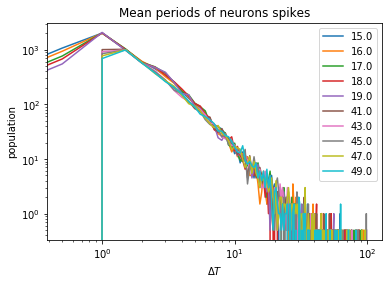

In [24]:
fig = plt.figure()
ax = fig.subplots()

desired_g_list = g_list[30:35:] + g_list[48:53:]

for g in desired_g_list:
    ax.loglog(bins[:-1],mean_heights_dict[g][:],label = round(g,2))
plt.legend()

# plt.xscale('log')
# plt.yscale('log')
# ax.set_xscale("log", base=10)
# ax.set_yscale("log", base=10)

ax.set_title('Mean periods of neurons spikes')
ax.set_ylabel('population')
ax.set_xlabel('$\Delta T$')
# fig.savefig(os.path.join(target_path,'mean_spiking_persiods_g_{}_{}.png'.format(connectivity_min,connectivity_max)) )

In [14]:
# plt.mean_heights_dict[desired_g_list[-1]]

In [23]:
min_con = 40
max_con = 35
g_arr = np.array(g_list)
np.where( g_arr > min_con)[0]

array([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

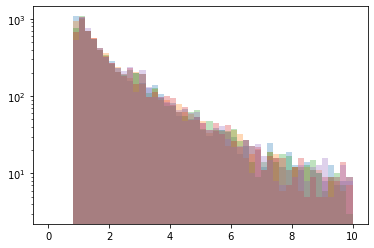

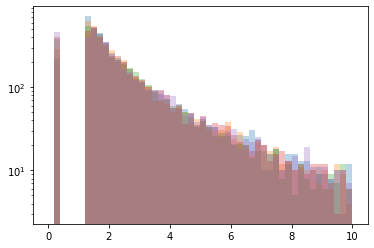

In [40]:
desired_g_list = g_list[30:35:]
for g in desired_g_list:
    plt.hist( mean_periods_arr_dict[g][0] , range = (0,10), bins = 50, log = True, alpha = 0.3)

plt.show()
desired_g_list = g_list[48:53:]
for g in desired_g_list:
    plt.hist( mean_periods_arr_dict[g][0] , range = (0,10), bins = 50, log = True, alpha = 0.3)

In [33]:
plt.hist?

# Silent neurons

In [15]:
def silent_neurons_num(pops_list):
    silent_num = np.zeros(len(pops_list))
    for i,pop in enumerate(pops_list):
        nan_num = np.count_nonzero(np.isnan(pop))
#         nan_num = 0 if nan_num != 0 else nan_num
        silent_num[i] = nan_num
    return np.mean(silent_num)

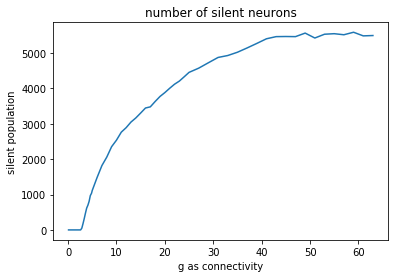

In [16]:
fig = plt.figure()
ax = fig.subplots()

silent_neurons = []

for g in desired_g_list:
    silent_neurons.append( silent_neurons_num(mean_periods_arr_dict[g]) )

ax.plot(desired_g_list,silent_neurons)
# plt.legend()

ax.set_title('number of silent neurons')
ax.set_ylabel('silent population')
ax.set_xlabel('g as connectivity')
fig.savefig(os.path.join(target_path,'silent_neurons_g_{}_{}.png'.format(connectivity_min,connectivity_max)) )